Example 5: Linear Discriminant Analysis vs Quadratic Discriminant Analysis
In this example we compare linear discriminant analysis and quadratic discriminant analysis

In [1]:
# import required packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

In [2]:
# define function for creating & plotting synthetic data set
def generate_2class_data(class1Mean, class1Cov, class2Mean, class2Cov, plot=True):
    
    np.random.seed(1)
    class1x = np.random.multivariate_normal(class1Mean, class1Cov, 100)
    class1y = np.zeros(100)
    class2x = np.random.multivariate_normal(class2Mean, class2Cov, 100)
    class2y = np.ones(100)
    
    X = np.concatenate((class1x, class2x), axis=0)
    y = np.concatenate((class1y, class2y))

    # Plotting the 2-class data
    if(plot):
        plt.title('Plotting 2-dimensional 2-class data')
        plt.scatter(class1x[:,0], class1x[:,1], color = 'b', label = 'Class 0')
        plt.scatter(class2x[:,0], class2x[:,1], color = 'r', label = 'Class 1')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.show()
        
    return X,y

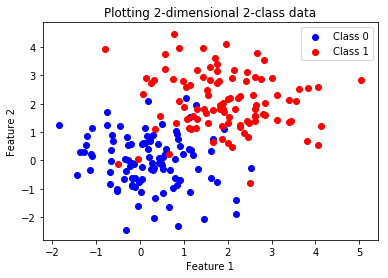

In [3]:
# first data set - covariance matrices are the same for both classes
class1Mean = [0, 0]
class2Mean = [2, 2]

class1Cov = [[1, 0], [0, 1]]
class2Cov = [[1, 0], [0, 1]]

X, y = generate_2class_data( class1Mean, class1Cov, class2Mean, class2Cov)

In [4]:
# applying LDA
clf1 = LinearDiscriminantAnalysis( solver = 'lsqr')
clf1.fit(X, y)

# model estimated parameters
print( 'Mean: ' )
print( clf1.means_ )
print( 'Covariance: ' )
print( clf1.covariance_)

Mean: 
[[ 0.22665544 -0.01327782]
 [ 1.9239746   2.06548483]]
Covariance: 
[[ 0.9283381  -0.1107471 ]
 [-0.1107471   0.95210951]]


In [5]:
# applying QDA
clf2 = QuadraticDiscriminantAnalysis( store_covariance = True )
clf2.fit(X, y)

# model estimated parameters
print( 'Mean: ' )
print( clf2.means_ )
print( 'Covariance: ' )
print( clf2.covariance_)

Mean: 
[[ 0.22665544 -0.01327782]
 [ 1.9239746   2.06548483]]
Covariance: 
[array([[ 0.74551937, -0.11560841],
       [-0.11560841,  0.89850426]]), array([[ 1.12991114, -0.10812311],
       [-0.10812311,  1.0249493 ]])]


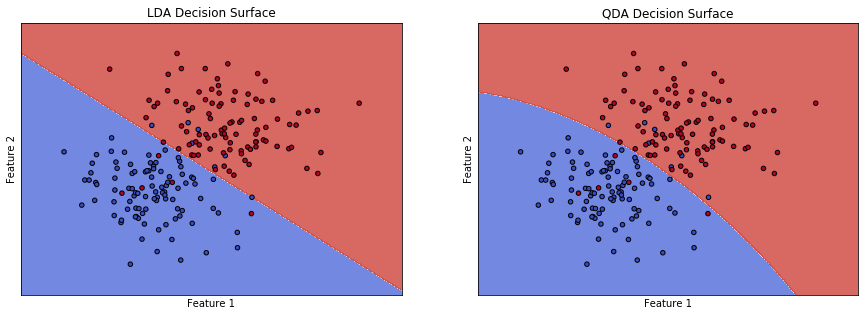

In [6]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, tr, **params):
    if tr == True:
        Z = clf.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
    else:  
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# plotting decision surface

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

#ax = plt.gca()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

plot_contours(ax1, clf1, xx, yy, False, cmap=plt.cm.coolwarm, alpha=0.8)
ax1.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax1.set_xlim(xx.min(), xx.max())
ax1.set_ylim(yy.min(), yy.max())
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_xticks(())
ax1.set_yticks(())
ax1.set_title('LDA Decision Surface')

plot_contours(ax2, clf2, xx, yy, False, cmap=plt.cm.coolwarm, alpha=0.8)
ax2.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax2.set_xlim(xx.min(), xx.max())
ax2.set_ylim(yy.min(), yy.max())
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.set_xticks(())
ax2.set_yticks(())
ax2.set_title('QDA Decision Surface')

plt.show()

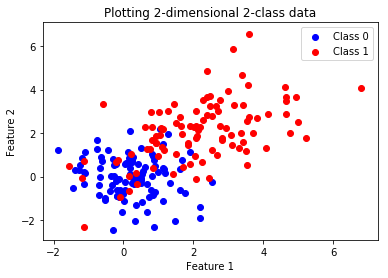

In [7]:
# second data set - covariance matrices are different
class1Mean = [0, 0]
class2Mean = [2, 2]

class1Cov = [[1, 0], [0, 1]]
class2Cov = [[1, 2], [2, 1]]

X, y = generate_2class_data( class1Mean, class1Cov, class2Mean, class2Cov)

In [8]:
# applying LDA
clf1 = LinearDiscriminantAnalysis( solver = 'lsqr')
clf1.fit(X, y)

# model estimated parameters
print( 'Mean: ' )
print( clf1.means_ )
print( 'Covariance: ' )
print( clf1.covariance_)

Mean: 
[[ 0.22665544 -0.01327782]
 [ 2.13941649  2.04680696]]
Covariance: 
[[1.55436704 0.52805791]
 [0.52805791 1.4446926 ]]


In [9]:
# applying QDA
clf2 = QuadraticDiscriminantAnalysis( store_covariance = True )
clf2.fit(X, y)

# model estimated parameters
print( 'Mean: ' )
print( clf2.means_ )
print( 'Covariance: ' )
print( clf2.covariance_)

Mean: 
[[ 0.22665544 -0.01327782]
 [ 2.13941649  2.04680696]]
Covariance: 
[array([[ 0.74551937, -0.11560841],
       [-0.11560841,  0.89850426]]), array([[2.39461607, 1.18239206],
       [1.18239206, 2.02006665]])]


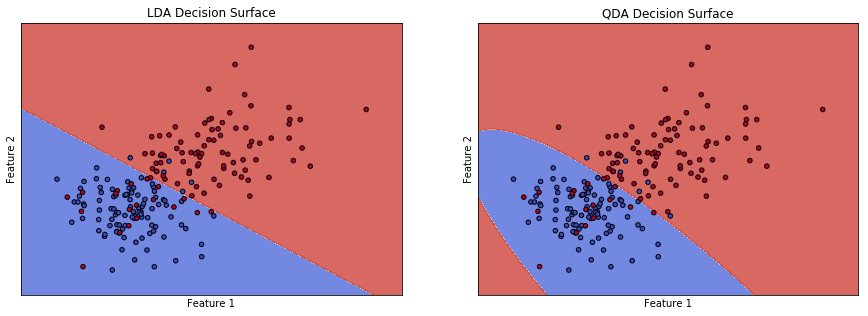

In [10]:
# plotting decision surface

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

#ax = plt.gca()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

plot_contours(ax1, clf1, xx, yy, False, cmap=plt.cm.coolwarm, alpha=0.8)
ax1.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax1.set_xlim(xx.min(), xx.max())
ax1.set_ylim(yy.min(), yy.max())
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_xticks(())
ax1.set_yticks(())
ax1.set_title('LDA Decision Surface')

plot_contours(ax2, clf2, xx, yy, False, cmap=plt.cm.coolwarm, alpha=0.8)
ax2.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax2.set_xlim(xx.min(), xx.max())
ax2.set_ylim(yy.min(), yy.max())
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.set_xticks(())
ax2.set_yticks(())
ax2.set_title('QDA Decision Surface')

plt.show()

In [11]:
# using basis expansion for lDA
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)

# applying LDA to expanded data
clf1 = LinearDiscriminantAnalysis( solver = 'lsqr')
clf1.fit(X_poly, y)

# model estimated parameters
print( 'Mean: ' )
print( clf1.means_ )
print( 'Covariance: ' )
print( clf1.covariance_)

Mean: 
[[ 1.          0.22665544 -0.01327782  0.78943687 -0.11746182  0.88969552]
 [ 1.          2.13941649  2.04680696  6.94777282  5.54954069  6.1892847 ]]
Covariance: 
[[ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          1.55436704  0.52805791  5.43433566  3.42356003  2.24880923]
 [ 0.          0.52805791  1.4446926   2.24150391  3.2901662   4.17500708]
 [ 0.          5.43433566  2.24150391 29.59551152 17.07506707  9.67390842]
 [ 0.          3.42356003  3.2901662  17.07506707 16.12036007 15.42545586]
 [ 0.          2.24880923  4.17500708  9.67390842 15.42545586 24.75300586]]


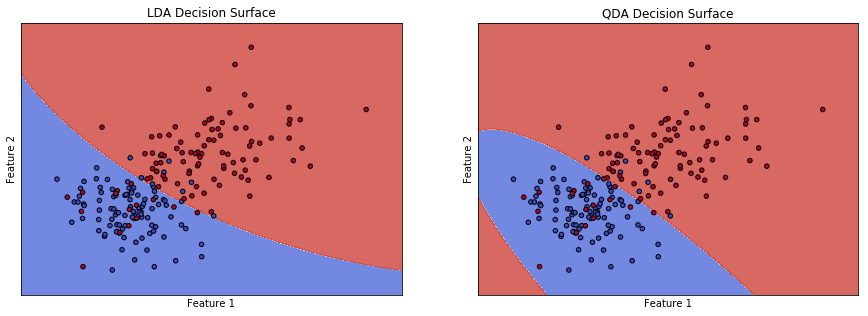

In [12]:
# plotting decision surface

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

#ax = plt.gca()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

plot_contours(ax1, clf1, xx, yy, True, cmap=plt.cm.coolwarm, alpha=0.8)
ax1.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax1.set_xlim(xx.min(), xx.max())
ax1.set_ylim(yy.min(), yy.max())
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_xticks(())
ax1.set_yticks(())
ax1.set_title('LDA Decision Surface')

plot_contours(ax2, clf2, xx, yy, False, cmap=plt.cm.coolwarm, alpha=0.8)
ax2.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax2.set_xlim(xx.min(), xx.max())
ax2.set_ylim(yy.min(), yy.max())
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.set_xticks(())
ax2.set_yticks(())
ax2.set_title('QDA Decision Surface')

plt.show()